# Using Python to perform data analytics
We will explore a dataset on livestock in the USA from 1907-2023


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings


In [113]:

sns.set_theme()
warnings.filterwarnings('ignore', 'use_inf_as_na')

In [114]:
us_data_file = r"USMeatStatsFull.xlsx"

us_weight_data_raw = commer_avg_live = pd.read_excel(
    us_data_file,
    sheet_name="SlaughterWeights-Full",
    header=[1,2],
    index_col=0
)

In [115]:
us_weight_data = us_weight_data_raw.copy()
us_weight_data.columns.set_names(["Weight_type", "Animal"], inplace=True)
us_weight_data.rename(columns={' live':'Federally inspected average live'}, inplace=True)
us_weight_data.columns

MultiIndex([(            'Commercial average live',          'Cattle'),
            (            'Commercial average live',          'Calves'),
            (            'Commercial average live',            'Hogs'),
            (            'Commercial average live', 'Sheep and lambs'),
            (   'Federally inspected average live',          'Cattle'),
            (   'Federally inspected average live',          'Calves'),
            (   'Federally inspected average live',            'Hogs'),
            (   'Federally inspected average live', 'Sheep and lambs'),
            (   'Federally inspected average live',        'Broilers'),
            (   'Federally inspected average live',  'Other chickens'),
            (   'Federally inspected average live',         'Turkeys'),
            ('Federally inspected average dressed',          'Cattle'),
            ('Federally inspected average dressed',          'Steers'),
            ('Federally inspected average dressed',         'Hei

In [116]:
clw = us_weight_data['Commercial average live']
flw = us_weight_data['Federally inspected average live']
fdw = us_weight_data['Federally inspected average dressed']
print(clw.columns)
print(flw.columns)
print(fdw.columns)

weights = [clw, flw, fdw]

Index(['Cattle', 'Calves', 'Hogs', 'Sheep and lambs'], dtype='object', name='Animal')
Index(['Cattle', 'Calves', 'Hogs', 'Sheep and lambs', 'Broilers',
       'Other chickens', 'Turkeys'],
      dtype='object', name='Animal')
Index(['Cattle', 'Steers', 'Heifers', 'Cows', 'Bulls and stags', 'Calves',
       'Hogs', 'Sheep and lambs'],
      dtype='object', name='Animal')


Cattle - Heifer, Steers, Cows, Bulls & Stags\
Heifers - Female cows that have not given birth yet but are older than calves\
Steers - Male cows that have been castrated\
Cows - Female cows that have given birth

Let's clean the data up a little:

In [117]:
print(us_weight_data.tail(7))
us_weight_data.drop(us_weight_data.tail(6).index, inplace=True)
us_weight_data.isna().sum() # Let's ignore the empty numbers for now

Weight_type                                        Commercial average live  \
Animal                                                              Cattle   
Jan-1921                                                               NaN   
NaN                                                                    NaN   
1/ Excludes slaughter on farms.                                        NaN   
2/ Slaughter in federally inspected and other p...                     NaN   
3/ Weight of a chilled animal carcass.                                 NaN   
Source: USDA, Economic Research Service calcula...                     NaN   
Date run: 2/27/2024 12:19:06 PM                                        NaN   

Weight_type                                                     \
Animal                                             Calves Hogs   
Jan-1921                                              NaN  NaN   
NaN                                                   NaN  NaN   
1/ Excludes slaughter on farms.  

Weight_type                          Animal         
Commercial average live              Cattle             284
                                     Calves             284
                                     Hogs               284
                                     Sheep and lambs    282
Federally inspected average live     Cattle               8
                                     Calves               8
                                     Hogs                 8
                                     Sheep and lambs      8
                                     Broilers           468
                                     Other chickens     468
                                     Turkeys            468
Federally inspected average dressed  Cattle               8
                                     Steers             476
                                     Heifers            476
                                     Cows               476
                                     Bulls and 

In [118]:
print(us_weight_data.dtypes)
us_weight_data.index = pd.to_datetime(us_weight_data.index, format="%b-%Y")
us_weight_data.rename_axis('Date')
print(us_weight_data.index.dtype)

Weight_type                          Animal         
Commercial average live              Cattle             float64
                                     Calves             float64
                                     Hogs               float64
                                     Sheep and lambs    float64
Federally inspected average live     Cattle             float64
                                     Calves             float64
                                     Hogs               float64
                                     Sheep and lambs    float64
                                     Broilers           float64
                                     Other chickens     float64
                                     Turkeys            float64
Federally inspected average dressed  Cattle             float64
                                     Steers             float64
                                     Heifers            float64
                                     Cows          

<Axes: ylabel='Cattle'>

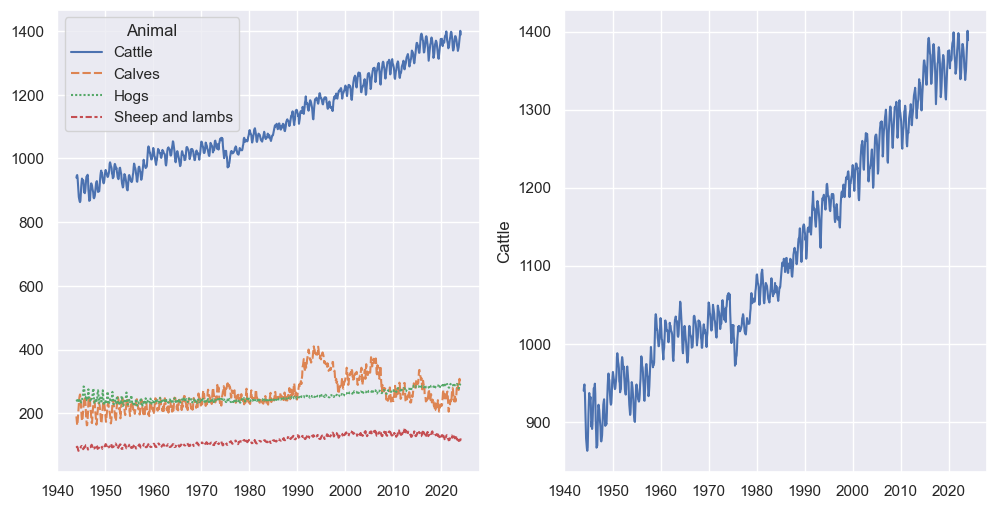

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.lineplot(us_weight_data['Commercial average live'], ax=axes[0])
sns.lineplot(us_weight_data['Commercial average live']['Cattle'], ax=axes[1])

We can see a linear relationship between year and cattle as well as yearly cycles
First let's investigate the linear relationship by performing a linear regression on the data.
Then we can look at the yearly cycles.

[6.08781535]


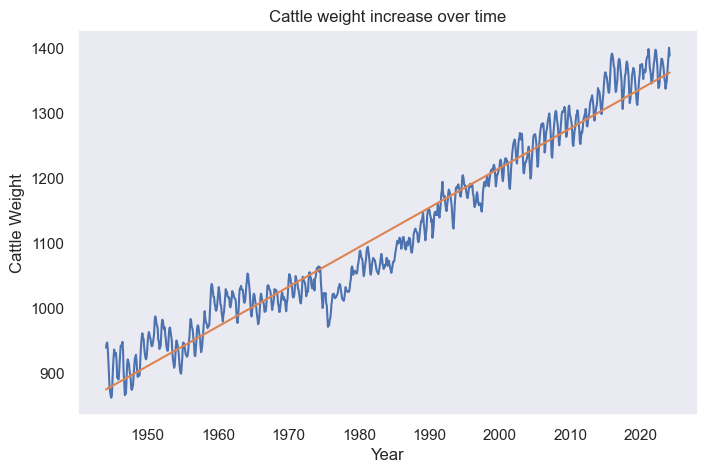

Between 1944 and 2024 average growth was 6.08782 pounds per year
[7.80740566]


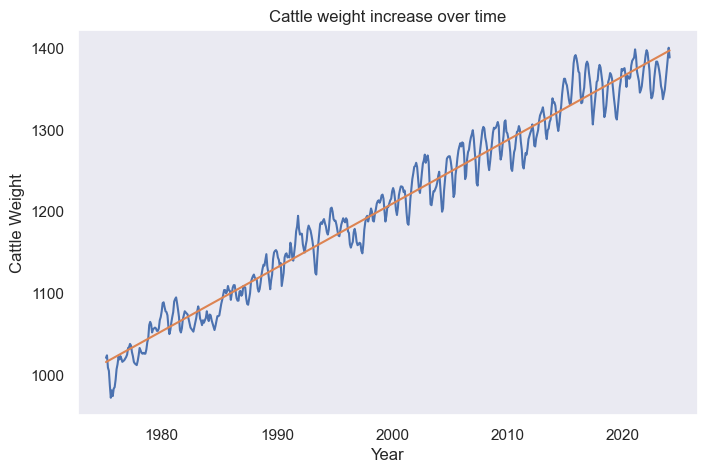

Between 1975 and 2024 average growth was 7.80741 pounds per year


In [120]:

def date_vs_nums_regression_plot(df, title, y_units):
    df = df.dropna()
    first_year = df.index.min().year
    last_year = df.index.max().year
    dates = (df.index.year.astype(int) + df.index.month.astype(int)/12).values
    X = dates.reshape(-1, 1)
    
    y = df.values
    model = LinearRegression()
    model.fit(X, y)

    plt.figure(figsize=[8,5])
    sns.lineplot(x = dates, y=y)
    print(model.coef_)
    growth = round(model.coef_[0],5)
    
    y_pred = model.predict(X)
    plt.plot(dates, y_pred)
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel(f"{df.name} Weight")
    plt.grid()
    plt.show()
    print(f"Between {first_year} and {last_year} average growth was {growth} {y_units} per year")

    return growth
    


date_vs_nums_regression_plot(us_weight_data['Commercial average live']['Cattle'], 'Cattle weight increase over time', 'pounds')
live_growth_1975_2024 = date_vs_nums_regression_plot(us_weight_data['Commercial average live']['Cattle'][us_weight_data.index > "1975"], 'Cattle weight increase over time', 'pounds')

So between 1975 and 2024 the average American cow has got 7.8lbs, that's 15 more steaks per cow. Or is it, does dressed weight grow at the same rate as live weight?

[5.0362752]


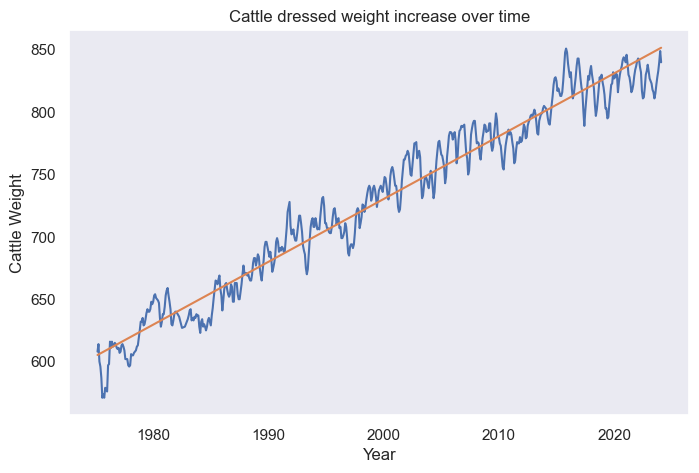

Between 1975 and 2024 average growth was 5.03628 pounds per year


5.03628

In [121]:
date_vs_nums_regression_plot(us_weight_data['Federally inspected average dressed']['Cattle'][us_weight_data.index > "1975"], 'Cattle dressed weight increase over time', 'pounds')

So slightly less growth on the processed weight which makes sense since not all the size increase will translate to edible meat.  How about the ratio of dressed weight to live weight?

[0.08791541]


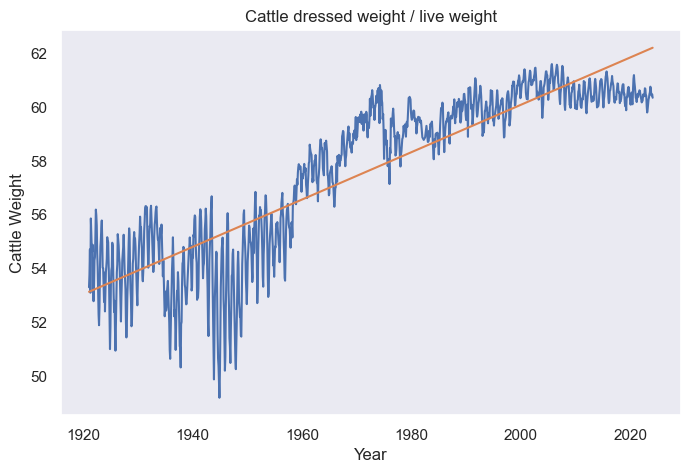

Between 1921 and 2024 average growth was 0.08792 % per year


0.08792

In [122]:
us_weight_data[('Dressed weight ratio', 'Cattle')] = 100 * us_weight_data['Federally inspected average dressed']['Cattle'] / us_weight_data['Federally inspected average live']['Cattle'] 
date_vs_nums_regression_plot(us_weight_data['Dressed weight ratio']['Cattle'], 'Cattle dressed weight / live weight', '%')

So since 1920 there has been some efficiency improvements bringing up the dressed weight to just over 60% which is now fairly steady

Now let's take a look at the cyclic nature of the cattle weight and see if we can explain it.

In [123]:

us_lw_1975 = us_weight_data['Federally inspected average live']['Cattle'][us_weight_data.index > "1975"]
base_weight = us_lw_1975[-1]
base_year = us_lw_1975.index.year.astype(int).min() + us_lw_1975.index.month.astype(int).min()/12
base_year


C:\Users\Oscar\AppData\Local\Temp\ipykernel_3472\250794253.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  base_weight = us_lw_1975[-1]


1975.0833333333333

In [124]:
lw_transformed = us_lw_1975[us_lw_1975.index > "1975"] - live_growth_1975_2024*(us_lw_1975.index.year.astype(int) + us_lw_1975.index.month.astype(int)/12 - base_year) 
lw_transformed

2024-01-01    1009.436910
2023-12-01    1022.087527
2023-11-01    1008.738145
2023-10-01     997.388762
2023-09-01     985.039380
                 ...     
1975-06-01     995.746912
1975-05-01    1014.397530
1975-04-01    1020.048148
1975-03-01    1036.698765
1975-02-01    1035.349382
Length: 588, dtype: float64

<Axes: >

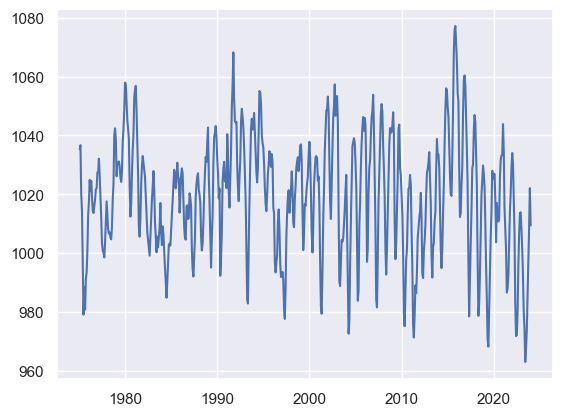

In [125]:
sns.lineplot(lw_transformed)

<Axes: >

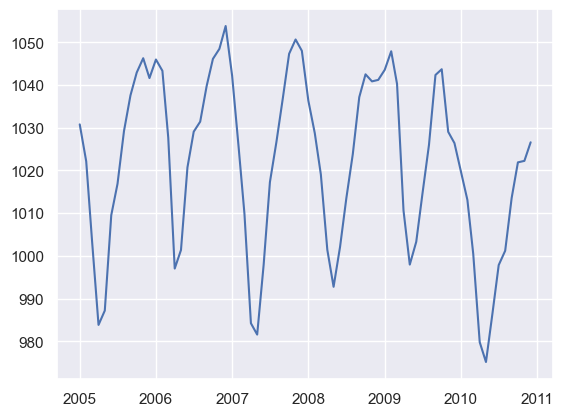

In [126]:
lw_transformed.sort_index(inplace=True)
sns.lineplot(lw_transformed['2005-01-01':'2010-12-31'])

These look like yearly cycles, with peaks near the end of the year. Let's add slaughter count of the different types of cattle to see if we can explain this.

In [127]:

slaughter_count = pd.read_excel(
    us_data_file,
    sheet_name="SlaughterCounts-Full",
    header=[1,2],
    index_col=0
)


In [128]:
cattle_cols = ["Cattle", "Steers", "Heifers", "Beef cows", "Dairy cows", "Bulls and stags"]
slaughter_count_cattle = slaughter_count["Federally inspected 3/"][cattle_cols]
slaughter_count_cattle.index = pd.to_datetime(slaughter_count_cattle.index, format="%b-%Y")
slaughter_count_cattle.sort_index(inplace=True)
slaughter_count_cattle = slaughter_count_cattle['1975':]
slaughter_count_cattle

,Cattle,Steers,Heifers,Beef cows,Dairy cows,Bulls and stags
1975-01-01,3152.3,1535.0,766.0,393.0,393.0,66.0
1975-02-01,2777.6,1412.0,700.0,303.0,303.0,59.0
1975-03-01,2825.6,1452.0,700.0,305.0,306.0,63.0
1975-04-01,2888.7,1428.0,707.0,341.0,342.0,71.0
1975-05-01,2851.0,1364.0,684.0,359.0,360.0,84.0
...,...,...,...,...,...,...
2023-09-01,2559.8,1206.5,788.6,275.8,240.5,48.4
2023-10-01,2767.7,1274.1,870.0,330.7,242.9,50.0
2023-11-01,2681.3,1209.2,856.9,341.0,229.7,44.4
2023-12-01,2548.8,1197.8,797.2,291.9,224.7,37.2


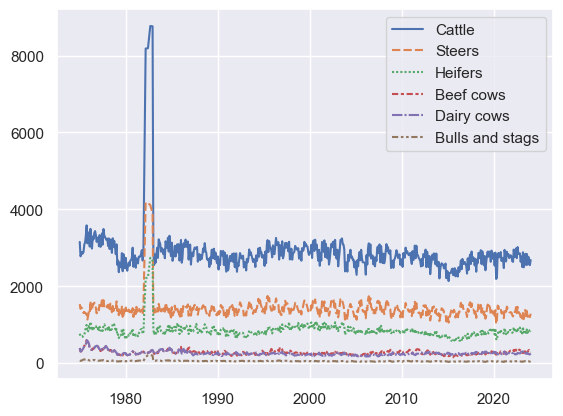

In [129]:
sns.lineplot(slaughter_count_cattle)
base_cattle_cols = ["Steers", "Heifers", "Beef cows", "Dairy cows", "Bulls and stags"]
# slaughter_count_cattle['Cattle'] == slaughter_count_cattle[["Steers", "Heifers", "Beef cows", "Dairy cows", "Bulls and stags"]].sum(axis=1)

C:\Users\Oscar\AppData\Local\Temp\ipykernel_3472\561577901.py:10: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.lineplot(slaughter_base_cattle_3years, palette=palette)


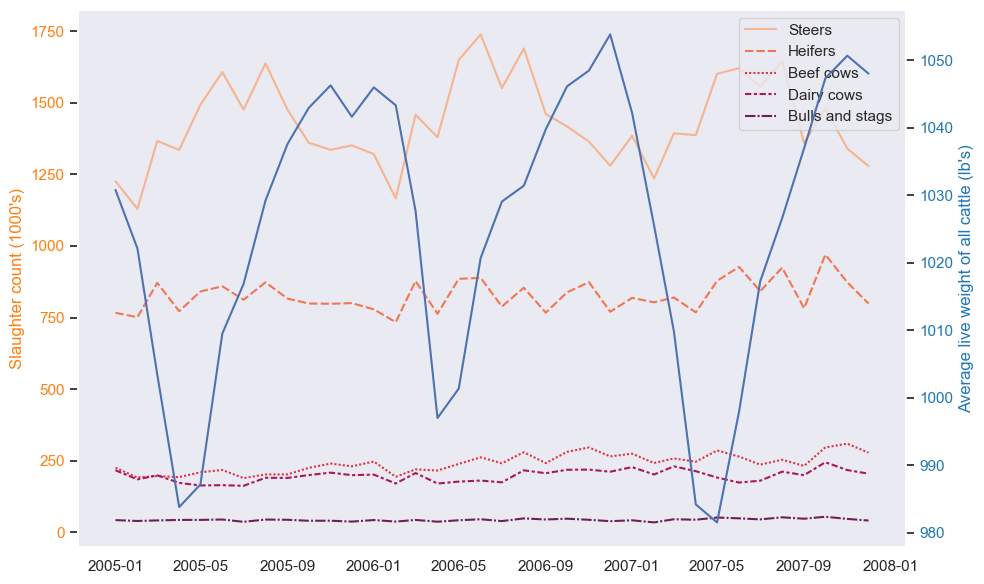

In [130]:
slaughter_base_cattle_3years = slaughter_count_cattle[base_cattle_cols]['2005-01-01':'2007-12-31']
fig, ax1 = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
color = 'tab:orange'
ax1.set_ylabel('Slaughter count (1000\'s)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.grid(None)
palette = sns.color_palette("rocket_r")
sns.lineplot(slaughter_base_cattle_3years, palette=palette)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average live weight of all cattle (lb\'s)', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.grid(None)
sns.lineplot(lw_transformed['2005-01-01':'2007-12-31'], ax=ax2)
fig.tight_layout()


This graph shows as the number of Steers being slaughtered each month decreases, the average live weight of cattle decreases. This is expected since Steers are both the heaviest and the largest in number being slaughtered

In [131]:
# Average live weight of each animal
laws = us_weight_data['Federally inspected average live']
laws = laws.dropna()
laws

Animal,Cattle,Calves,Hogs,Sheep and lambs,Broilers,Other chickens,Turkeys
2024-01-01,1392.0,292.0,292.0,124.0,6.58,6.95,33.35
2023-12-01,1404.0,292.0,291.0,117.0,6.61,6.81,31.56
2023-11-01,1390.0,300.0,289.0,118.0,6.61,6.92,30.55
2023-10-01,1378.0,307.0,285.0,118.0,6.70,6.89,30.57
2023-09-01,1365.0,285.0,281.0,118.0,6.61,7.10,31.55
...,...,...,...,...,...,...,...
1960-05-01,1033.0,222.0,242.0,99.0,3.36,5.14,12.66
1960-04-01,1036.0,205.0,239.0,103.0,3.35,5.12,11.20
1960-03-01,1049.0,187.0,232.0,105.0,3.29,5.15,10.53
1960-02-01,1056.0,199.0,232.0,104.0,3.30,4.97,12.79


In [132]:
avg_df = laws.groupby(by = lambda x: x.year).mean()
avg_df.index

Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 2024],
      dtype='int64')

In [139]:
year_list = [1960, 1980, 2000, 2020]
avg_df.index.isin(year_list)
compare_df = avg_df[avg_df.index.isin(year_list)]
compare_df

Animal,Cattle,Calves,Hogs,Sheep and lambs,Broilers,Other chickens,Turkeys
1960,1032.916667,211.083333,239.083333,99.250000,3.355833,4.905000,15.055833
1980,1080.000000,214.333333,242.000000,112.333333,3.947500,4.381667,18.499167
2000,1222.083333,311.833333,262.500000,136.416667,4.999167,5.310833,25.635000
2020,1376.000000,244.000000,289.000000,129.166667,6.408333,6.853333,32.272500


Animal,Calves,Hogs,Sheep and lambs,Broilers,Other chickens,Turkeys
1960,211.083333,239.083333,99.250000,3.355833,4.905000,15.055833
1980,214.333333,242.000000,112.333333,3.947500,4.381667,18.499167
2000,311.833333,262.500000,136.416667,4.999167,5.310833,25.635000
2020,244.000000,289.000000,129.166667,6.408333,6.853333,32.272500


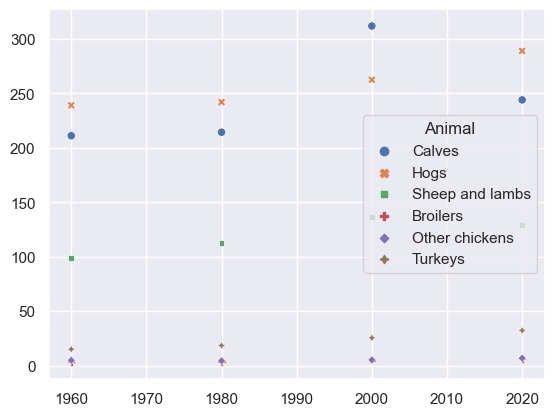

In [150]:
# cattle = 
small_animals = ["Calves", "Hogs", "Sheep and lambs", "Broilers", "Other chickens", "Turkeys"]
sns.scatterplot(compare_df[small_animals])
compare_df[small_animals]